In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

TABULAR_PATH = 'data/tabular/'
OUTPUT_PATH = './data/output/'
data_files = os.listdir(TABULAR_PATH)

In [2]:
def get_info(df):
    info_df = df.describe(include='all').T
    info_df['dtypes'] = df.dtypes
    info_df['missing'] = df.isna().sum()
    return info_df

In [3]:
population_data = pd.read_excel(TABULAR_PATH+'Population 2010, 2015 ARMM,BCT.xlsx')
cond = population_data["PSGC_REGI"]=="PH150000000"
cols = ['REGI', 'PSGC_REGI', 'PROV', 'PSGC_PROV', 'MuniCities',
       'PSGC_CITY/MUNI', 'BrgyName', 'PSGC_BRGY']
psgc_info = population_data.loc[cond,cols]
print("psgc_info",psgc_info.shape)

Population_Schools_SDGs_df = pd.read_csv(OUTPUT_PATH+'Population_Schools_SDGs_Clean.csv')
print("Population_Schools_SDGs_df",Population_Schools_SDGs_df.shape)

cols = Population_Schools_SDGs_df.columns
popn_cols = [col for col in cols if '_age_' in col]
index_split = popn_cols.index('both_age_6_to_12')

popn_age_cols = popn_cols[:index_split]+['PSGC_BRGY']
popn_age_df = Population_Schools_SDGs_df[popn_age_cols]
print("popn_age_df",popn_age_df.shape)

student_age_cols = popn_cols[index_split:]+['PSGC_BRGY']
student_age_df = Population_Schools_SDGs_df[student_age_cols]
print("student_age_df",student_age_df.shape)

school_cols = [col for col in cols if 'SCH' in col.upper()]+['PSGC_BRGY']
school_df = Population_Schools_SDGs_df[school_cols]
print("school_df",school_df.shape)

sdg_cols = [col for col in cols if 'SDG' in col.upper()]+['PSGC_BRGY']
sdg_df = Population_Schools_SDGs_df[sdg_cols]
print("sdg_df",sdg_df.shape)

psgc_info (2482, 8)
Population_Schools_SDGs_df (2482, 102)
popn_age_df (2482, 52)
student_age_df (2482, 16)
school_df (2482, 15)
sdg_df (2482, 19)


## Schools Data

In [4]:
school_data = pd.merge(psgc_info,school_df,how="left",on='PSGC_BRGY')
get_info(school_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
No_of_Schools,1568,NaN,NaN,NaN,1.72768,1.43986,1,1,1,2,15,float64,914
SCH_TYPE_PRIVATE,1756,NaN,NaN,NaN,0.137244,0.648436,0,0,0,0,8,float64,726
SCH_TYPE_PUBLIC,1756,NaN,NaN,NaN,1.36959,0.89096,0,1,1,2,11,float64,726
SCH_TYPE_SUC,1756,NaN,NaN,NaN,0.0307517,0.203025,0,0,0,0,3,float64,726
SCH_CAT_CES,1756,NaN,NaN,NaN,0.100228,0.309728,0,0,0,0,3,float64,726
SCH_CAT_ES,1756,NaN,NaN,NaN,0.726651,0.725911,0,0,1,1,9,float64,726
SCH_CAT_JHS,1756,NaN,NaN,NaN,0.0888383,0.29249,0,0,0,0,2,float64,726
SCH_CAT_MD,1756,NaN,NaN,NaN,0.0199317,0.143823,0,0,0,0,2,float64,726
SCH_CAT_PES,1756,NaN,NaN,NaN,0.0535308,0.341747,0,0,0,0,7,float64,726
SCH_CAT_PJHS,1756,NaN,NaN,NaN,0.0296128,0.203194,0,0,0,0,4,float64,726


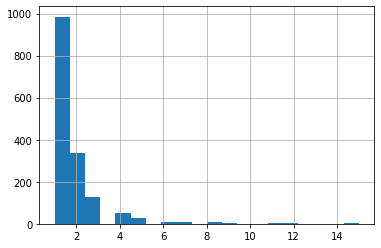

In [5]:
school_data['No_of_Schools'].hist(bins=20);

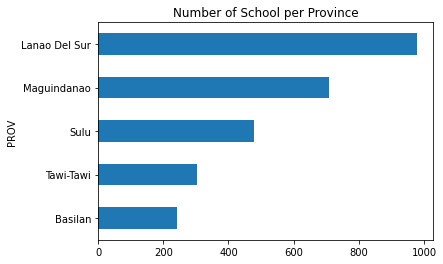

In [6]:
school_data.groupby('PROV')['No_of_Schools']\
            .sum()\
            .sort_values(ascending=True)\
            .plot.barh()
plt.title("Number of School per Province")
plt.show();

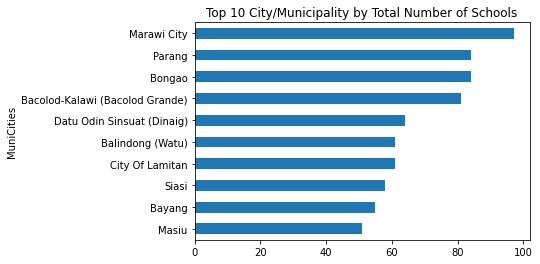

In [7]:
school_data.groupby('MuniCities')['No_of_Schools']\
            .sum()\
            .sort_values(ascending=True)\
            .tail(10)\
            .plot.barh()
plt.title("Top 10 City/Municipality by Total Number of Schools")
plt.show();

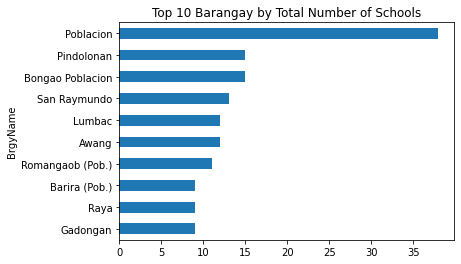

In [8]:
school_data.groupby('BrgyName')['No_of_Schools']\
            .sum()\
            .sort_values(ascending=True)\
            .tail(10)\
            .plot.barh()
plt.title("Top 10 Barangay by Total Number of Schools")
plt.show();

In [9]:
cols = [col for col in school_data.columns if "SCH_TYPE" in col]
school_data.groupby("PROV")[cols].sum()

,SCH_TYPE_PRIVATE,SCH_TYPE_PUBLIC,SCH_TYPE_SUC
PROV,,,
Basilan,13.0,225.0,1.0
Lanao Del Sur,120.0,833.0,21.0
Maguindanao,75.0,631.0,1.0
Sulu,16.0,456.0,7.0
Tawi-Tawi,17.0,260.0,24.0


In [10]:
cols = [col for col in school_data.columns if "SCH_CAT" in col]
school_data.groupby("PROV")[cols].sum()

,SCH_CAT_CES,SCH_CAT_ES,SCH_CAT_JHS,SCH_CAT_MD,SCH_CAT_PES,SCH_CAT_PJHS,SCH_CAT_PS,SCH_CAT_PSHS,SCH_CAT_SHS,SCH_CAT_SUC
PROV,,,,,,,,,,
Basilan,16.0,169.0,16.0,1.0,6.0,0.0,14.0,6.0,10.0,1.0
Lanao Del Sur,74.0,287.0,87.0,19.0,44.0,32.0,332.0,25.0,53.0,21.0
Maguindanao,48.0,388.0,34.0,12.0,33.0,9.0,114.0,21.0,47.0,1.0
Sulu,19.0,268.0,14.0,3.0,4.0,4.0,130.0,5.0,25.0,7.0
Tawi-Tawi,19.0,164.0,5.0,0.0,7.0,7.0,53.0,3.0,19.0,24.0


## Population Data

In [11]:
popn_age_data = pd.merge(psgc_info,popn_age_df,how="left",on='PSGC_BRGY')
get_info(popn_age_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
both_age_0_to_4,2482,NaN,NaN,NaN,456.75,583.899,2,194,307,534,10087,float64,0
male_age_0_to_4,2482,NaN,NaN,NaN,232.164,303.179,0,95,155,267,5242,float64,0
female_age_0_to_4,2482,NaN,NaN,NaN,224.586,283.942,2,94,154,265,4845,float64,0
both_age_5_to_9,2482,NaN,NaN,NaN,232.342,317.036,8,102,153,264,5386,float64,0
male_age_5_to_9,2482,NaN,NaN,NaN,117.104,160.74,4,50,77,133,2682,float64,0
female_age_5_to_9,2482,NaN,NaN,NaN,115.239,157.194,3,50,77,130,2745,float64,0
both_age_10_to_14,2482,NaN,NaN,NaN,209.51,297.393,11,86,138,236,5119,float64,0
male_age_10_to_14,2482,NaN,NaN,NaN,105.564,151.909,4,43,68,121,2557,float64,0
female_age_10_to_14,2482,NaN,NaN,NaN,103.945,146.328,6,43,69,118,2592,float64,0
both_age_15_to_19,2482,NaN,NaN,NaN,176.341,265.826,2,68,112,196,5164,float64,0


In [12]:
cols = [col for col in popn_age_data.columns if "both_" in col]
popn_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
both_age_0_to_4,103840.0,323933.0,379035.0,219482.0,107363.0
both_age_5_to_9,50268.0,162546.0,189599.0,120542.0,53718.0
both_age_10_to_14,45601.0,138399.0,172035.0,113736.0,50232.0
both_age_15_to_19,39087.0,115084.0,146293.0,94363.0,42852.0
both_age_20_to_24,29635.0,98745.0,108478.0,66754.0,34588.0
both_age_25_to_29,25732.0,85420.0,99114.0,58700.0,30882.0
both_age_30_to_34,22195.0,71093.0,84212.0,53748.0,26238.0
both_age_35_to_39,20366.0,69634.0,81946.0,56605.0,25686.0
both_age_40_to_44,17144.0,56687.0,67590.0,47365.0,20814.0
both_age_45_to_49,14914.0,45304.0,54993.0,37080.0,17305.0


In [13]:
cols = [col for col in popn_age_data.columns if ("female_" in col)]
popn_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
female_age_0_to_4,50432.0,162248.0,182515.0,110001.0,52226.0
female_age_5_to_9,24470.0,82308.0,92173.0,60752.0,26319.0
female_age_10_to_14,22510.0,70069.0,83477.0,56993.0,24943.0
female_age_15_to_19,19663.0,59148.0,72043.0,47926.0,21448.0
female_age_20_to_24,15297.0,52285.0,54771.0,35167.0,17619.0
female_age_25_to_29,13358.0,45093.0,51188.0,31456.0,16205.0
female_age_30_to_34,11353.0,37594.0,43199.0,28543.0,13504.0
female_age_35_to_39,10611.0,36037.0,42058.0,29337.0,12948.0
female_age_40_to_44,8785.0,28842.0,33668.0,23814.0,10050.0
female_age_45_to_49,7523.0,22165.0,26599.0,17823.0,8438.0


In [14]:
cols = [col for col in popn_age_data.columns if ("male_" in col) and not ("female_" in col)]
popn_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
male_age_0_to_4,53408.0,161685.0,196520.0,109481.0,55137.0
male_age_5_to_9,25798.0,80238.0,97426.0,59790.0,27399.0
male_age_10_to_14,23091.0,68330.0,88558.0,56743.0,25289.0
male_age_15_to_19,19424.0,55936.0,74250.0,46437.0,21404.0
male_age_20_to_24,14338.0,46460.0,53707.0,31587.0,16969.0
male_age_25_to_29,12374.0,40327.0,47926.0,27244.0,14677.0
male_age_30_to_34,10842.0,33499.0,41013.0,25205.0,12734.0
male_age_35_to_39,9755.0,33597.0,39888.0,27268.0,12738.0
male_age_40_to_44,8359.0,27845.0,33922.0,23551.0,10764.0
male_age_45_to_49,7391.0,23139.0,28394.0,19257.0,8867.0


In [15]:
student_age_data = pd.merge(psgc_info,student_age_df,how="left",on='PSGC_BRGY')
get_info(student_age_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
both_age_6_to_12,2482,NaN,NaN,NaN,318.274,441.272,13,136,211,361,7746,float64,0
male_age_6_to_12,2482,NaN,NaN,NaN,160.387,224.99,3,67,105.5,184,3815,float64,0
female_age_6_to_12,2482,NaN,NaN,NaN,157.888,217.372,6,68,107,179,3931,float64,0
both_age_13_to_16,2482,NaN,NaN,NaN,158.958,229.846,5,64,104,179,3999,float64,0
male_age_13_to_16,2482,NaN,NaN,NaN,79.8215,115.929,2,31,52,91,1967,float64,0
female_age_13_to_16,2482,NaN,NaN,NaN,79.1362,114.722,2,32,52,89,2032,float64,0
both_age_17_to_18,2482,NaN,NaN,NaN,66.7373,103.123,1,25,42,73,2030,float64,0
male_age_17_to_18,2482,NaN,NaN,NaN,33.0117,51.5566,0,12,21,37,1011,float64,0
female_age_17_to_18,2482,NaN,NaN,NaN,33.7256,52.251,0,13,21,37,1019,float64,0
both_age_19_to_22,2482,NaN,NaN,NaN,114.521,174.738,0,44,73,124,3665,float64,0


In [16]:
cols = [col for col in student_age_data.columns if "both_" in col]
student_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
both_age_6_to_12,68502.0,217504.0,259675.0,169481.0,74795.0
both_age_13_to_16,34605.0,104100.0,131971.0,86121.0,37736.0
both_age_17_to_18,14991.0,43206.0,55289.0,35709.0,16447.0
both_age_19_to_22,25252.0,80242.0,91142.0,57982.0,29624.0
both_age_6_to_16,103107.0,321604.0,391646.0,255602.0,112531.0


In [17]:
cols = [col for col in student_age_data.columns if ("female_" in col)]
student_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
female_age_6_to_12,33576.0,110141.0,126003.0,85262.0,36895.0
female_age_13_to_16,17082.0,52707.0,64552.0,43437.0,18638.0
female_age_17_to_18,7608.0,22378.0,27257.0,18111.0,8353.0
female_age_19_to_22,13002.0,42094.0,45344.0,30017.0,14838.0
female_age_6_to_16,50658.0,162848.0,190555.0,128699.0,55533.0


In [18]:
cols = [col for col in student_age_data.columns if ("male_" in col) and not ("female_" in col)]
student_age_data.groupby("PROV")[cols].sum().T

PROV,Basilan,Lanao Del Sur,Maguindanao,Sulu,Tawi-Tawi
male_age_6_to_12,34926.0,107363.0,133672.0,84219.0,37900.0
male_age_13_to_16,17523.0,51393.0,67419.0,42684.0,19098.0
male_age_17_to_18,7383.0,20828.0,28032.0,17598.0,8094.0
male_age_19_to_22,12250.0,38148.0,45798.0,27965.0,14786.0
male_age_6_to_16,52449.0,158756.0,201091.0,126903.0,56998.0


## SDG-related Data

In [19]:
sdg_data = pd.merge(psgc_info,sdg_df,how="left",on='PSGC_BRGY')
get_info(sdg_df)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing
SDG_Households_Electricity_Light_Pct,2482,NaN,NaN,NaN,0.510426,0.446279,0,0.0138889,0.617411,0.990172,1,float64,0
SDG_Households_Kerosene_Gass_Light_Pct,2482,NaN,NaN,NaN,0.166043,0.26629,0,0,0.0235141,0.216544,1,float64,0
SDG_Households_Drinking_Owned_Faucet_Pct,2482,NaN,NaN,NaN,0.0747605,0.189669,0,0,0.00340152,0.0298225,1,float64,0
SDG_Households_Drinking_Shared_Faucet_Pct,2482,NaN,NaN,NaN,0.121344,0.256643,0,0,0.002137,0.0582168,1,float64,0
SDG_Households_Construction_Material_Concrete_Pct,2482,NaN,NaN,NaN,0.150016,0.203049,0,0.00958088,0.0572626,0.220254,1,float64,0
SDG_Building_Tenure_Type_Owned_Pct,2482,NaN,NaN,NaN,0.69065,0.340925,0,0.410725,0.846323,0.990091,1,float64,0
SDG_Type_Building_Single_Pct,2482,NaN,NaN,NaN,0.890544,0.202187,0,0.892828,0.981566,1,1,float64,0
SDG_Type_Worker_Man,2482,NaN,NaN,NaN,0.104086,0.106639,0,0.027064,0.0648119,0.144772,0.716667,float64,0
SDG_Type_Worker_Pro,2482,NaN,NaN,NaN,0.0335493,0.0476831,0,0.00460829,0.0164835,0.0410889,0.425,float64,0
SDG_Type_Worker_Tec,2482,NaN,NaN,NaN,0.0110898,0.022368,0,0,0.00399203,0.0125,0.282258,float64,0
